In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [2]:
# pass in column names for each CSV
u_cols = ['user_id','sex','age','occupation','zip_code']
users = pd.read_csv('users1.csv', sep=',', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ratings1.csv', sep=',', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movies1.csv', sep=',', names=m_cols, usecols=range(3),
                     encoding='latin-1')

In [6]:
movies.head()
moviescripted=movies[0::10]
userscripted=users[0::10]
moviescripted.head()


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
10,11,American President,The (1995)
20,21,Get Shorty (1995),Action|Comedy|Drama
30,31,Dangerous Minds (1995),Drama
40,41,Richard III (1995),Drama|War


In [5]:
userscripted.head()

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
10,11,F,25,1,04093
20,21,M,18,16,99353
30,31,M,56,7,06840
40,41,F,18,4,15116


In [7]:
userscripted.info()
print("\n")
moviescripted.info()
print("\n")
movies.info()
print("\n")
users.info()
print("\n")
ratings.info()

users.describe()

movies.describe()

ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 6030
Data columns (total 5 columns):
user_id       604 non-null int64
sex           604 non-null object
age           604 non-null int64
occupation    604 non-null int64
zip_code      604 non-null object
dtypes: int64(3), object(2)
memory usage: 23.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 3880
Data columns (total 3 columns):
movie_id    389 non-null int64
title       389 non-null object
genres      389 non-null object
dtypes: int64(1), object(2)
memory usage: 9.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
sex           6040 non-nul

,user_id,movie_id,rating,unix_timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [8]:
users['occupation'].head()

0    10
1    16
2    15
3     7
4    20
Name: occupation, dtype: int64

In [9]:
users['age'].fillna(users['age'].mode()[0], inplace=True)
users.isnull().sum()

users.describe()

,user_id,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 6030
Data columns (total 5 columns):
user_id       604 non-null int64
sex           604 non-null object
age           604 non-null int64
occupation    604 non-null int64
zip_code      604 non-null object
dtypes: int64(3), object(2)
memory usage: 23.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 3880
Data columns (total 3 columns):
movie_id    389 non-null int64
title       389 non-null object
genres      389 non-null object
dtypes: int64(1), object(2)
memory usage: 9.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
sex           6040 non-nul

D:\anaconda\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


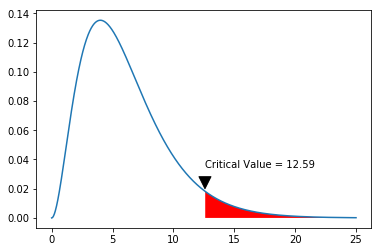

In [1]:
#users.drop(['user_id'], axis=1, inplace=True)
users1=users[['age','sex']]
users1.head()
table=pd.crosstab(index=users1['age'],columns=users1['sex'])
table

def change_age(age):
    if age == 1:
        return 'Under 18'
    elif age ==18:
        return '18-24'
    elif age==25:
        return '25-34'
    elif age ==35:
        return '35-44'
    elif age==45:
        return '45-49'
    elif age ==50:
        return '50-55'
    elif age==56:
        return '56+'
users1['age'] = users1['age'].apply(change_age)
table = pd.crosstab(index=[users1['sex']], columns=users1['age'])
table

freq=table
import scipy.stats as stats
chi_stats = stats.chi2_contingency(table)
chi_stats[0]
alpha = 0.05
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value
chi_stats[0]

x = np.linspace(0, 25, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

